In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../")

from tqdm import tqdm_notebook
from src import HeavyBall, NesterovMUFunc


In [74]:
class NesterovMUFuncEnemy(NesterovMUFunc):

    def estimation_grad(self, x, direction_point, x_star):
        g = self.grad(x)
        size = self.alpha * np.linalg.norm(g)
        diff = direction_point - x_star
        noise = diff / np.linalg.norm(diff) * size
        est = g - noise
        return est



In [75]:
def nesterov_plot(iters: int = 100, alphas = (), mu = 1, L = 10):
    d = 1001
    start = np.zeros(d)
    start[0] = 1000
    
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(20, 8), dpi=120)
        for j, alpha in enumerate(alphas):
            nesterov = NesterovMUFuncEnemy(L=L, mu=mu, alpha=alpha, d=d)
            heavy = HeavyBall(start=start, L=L, mu=mu, func=nesterov)
            nesterov_true = NesterovMUFuncEnemy(L=L, mu=mu, alpha=0, d=d)
            heavy_true = HeavyBall(start=start, L=L, mu=mu, func=nesterov_true)
            for _ in tqdm_notebook(range(iters)):
                heavy.step()
                heavy_true.step()
            plt.subplot(1, 3, j + 1)
            xs = heavy.history
            xst = heavy_true.history
            values = [nesterov(x) for x in xs]
            plt.semilogy(np.arange(len(xs)), values, label="Noised")
            plt.semilogy(np.arange(len(xs)), [nesterov(x) for x in xst], label="Real")
            plt.xlabel(r"Iterations $N$")
            plt.ylabel(r"$f(x^N) - f^*$")
            plt.title(fr"$\alpha$ = {alpha:.3f}")
            plt.legend()
        plt.suptitle(fr"Dimension - {d}, L - {L}, $\mu$ - {mu}")
        plt.show()
    return xs

/tmp/ipykernel_92867/593263340.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

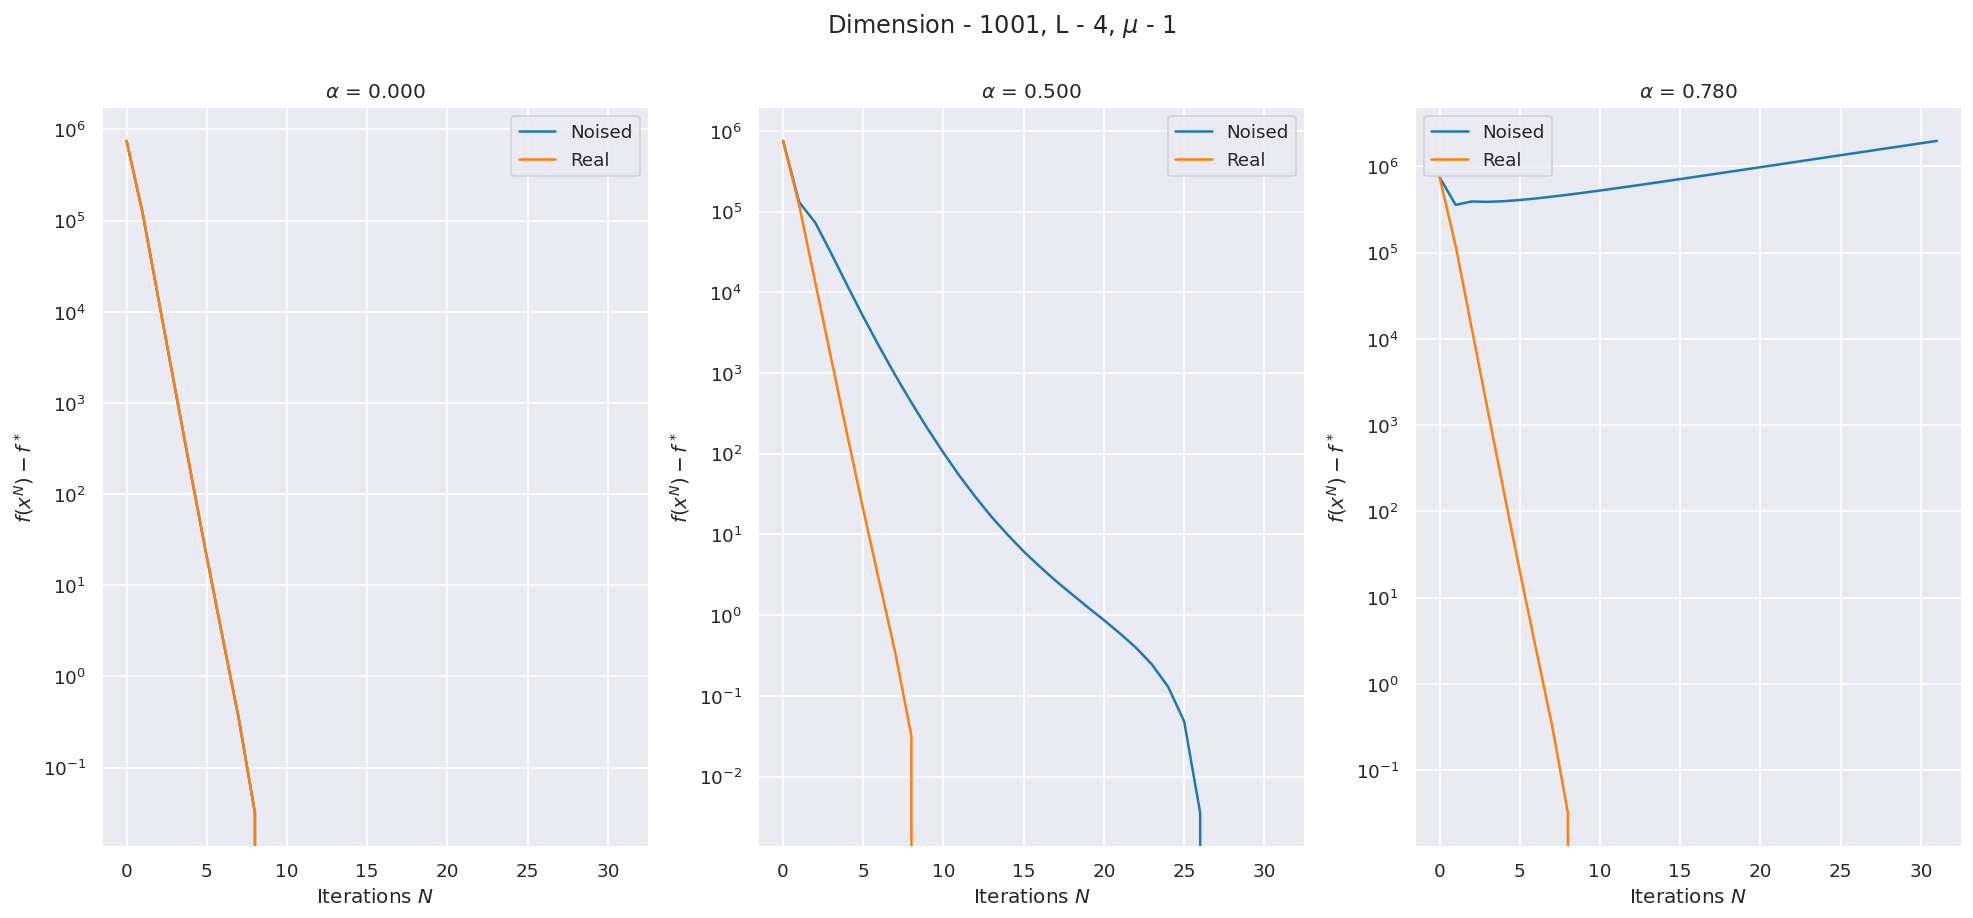

In [76]:
_ = nesterov_plot(30, alphas=[0, 0.5, 0.78], mu = 1, L = 4)

/tmp/ipykernel_92867/593263340.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

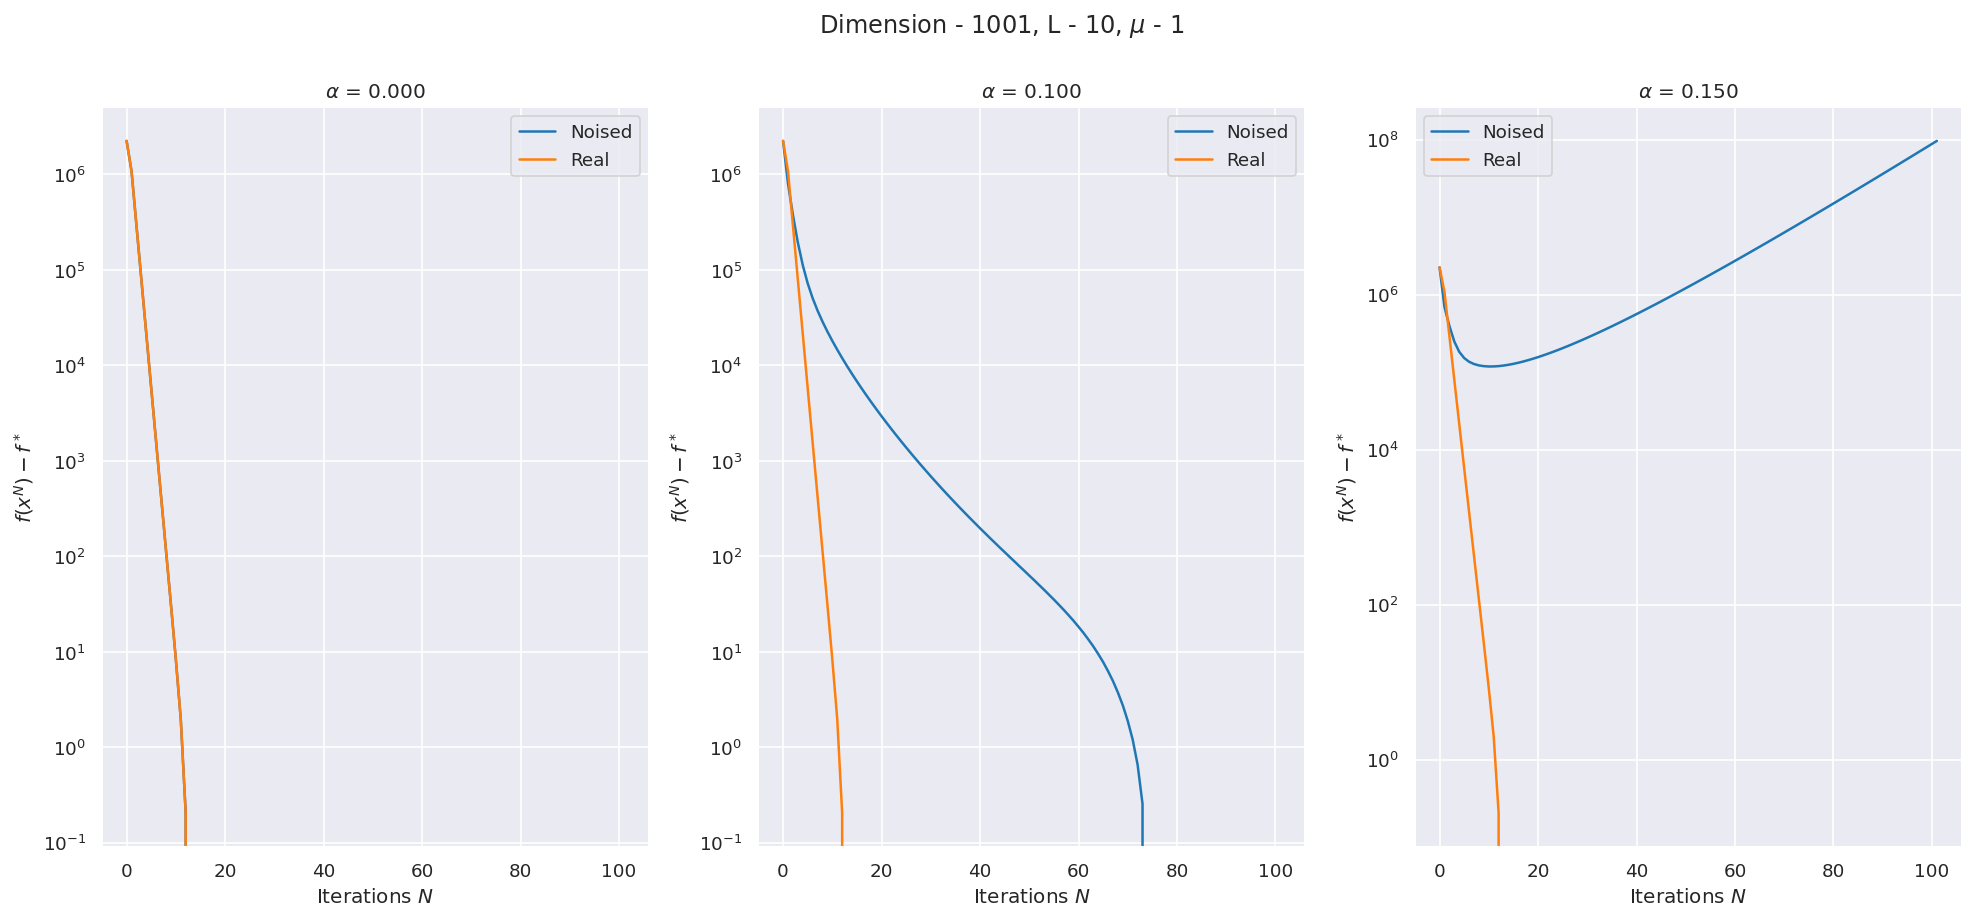

In [77]:
_ = nesterov_plot(100, alphas=[0, 0.1, 0.15], mu = 1, L = 10)

/tmp/ipykernel_92867/593263340.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

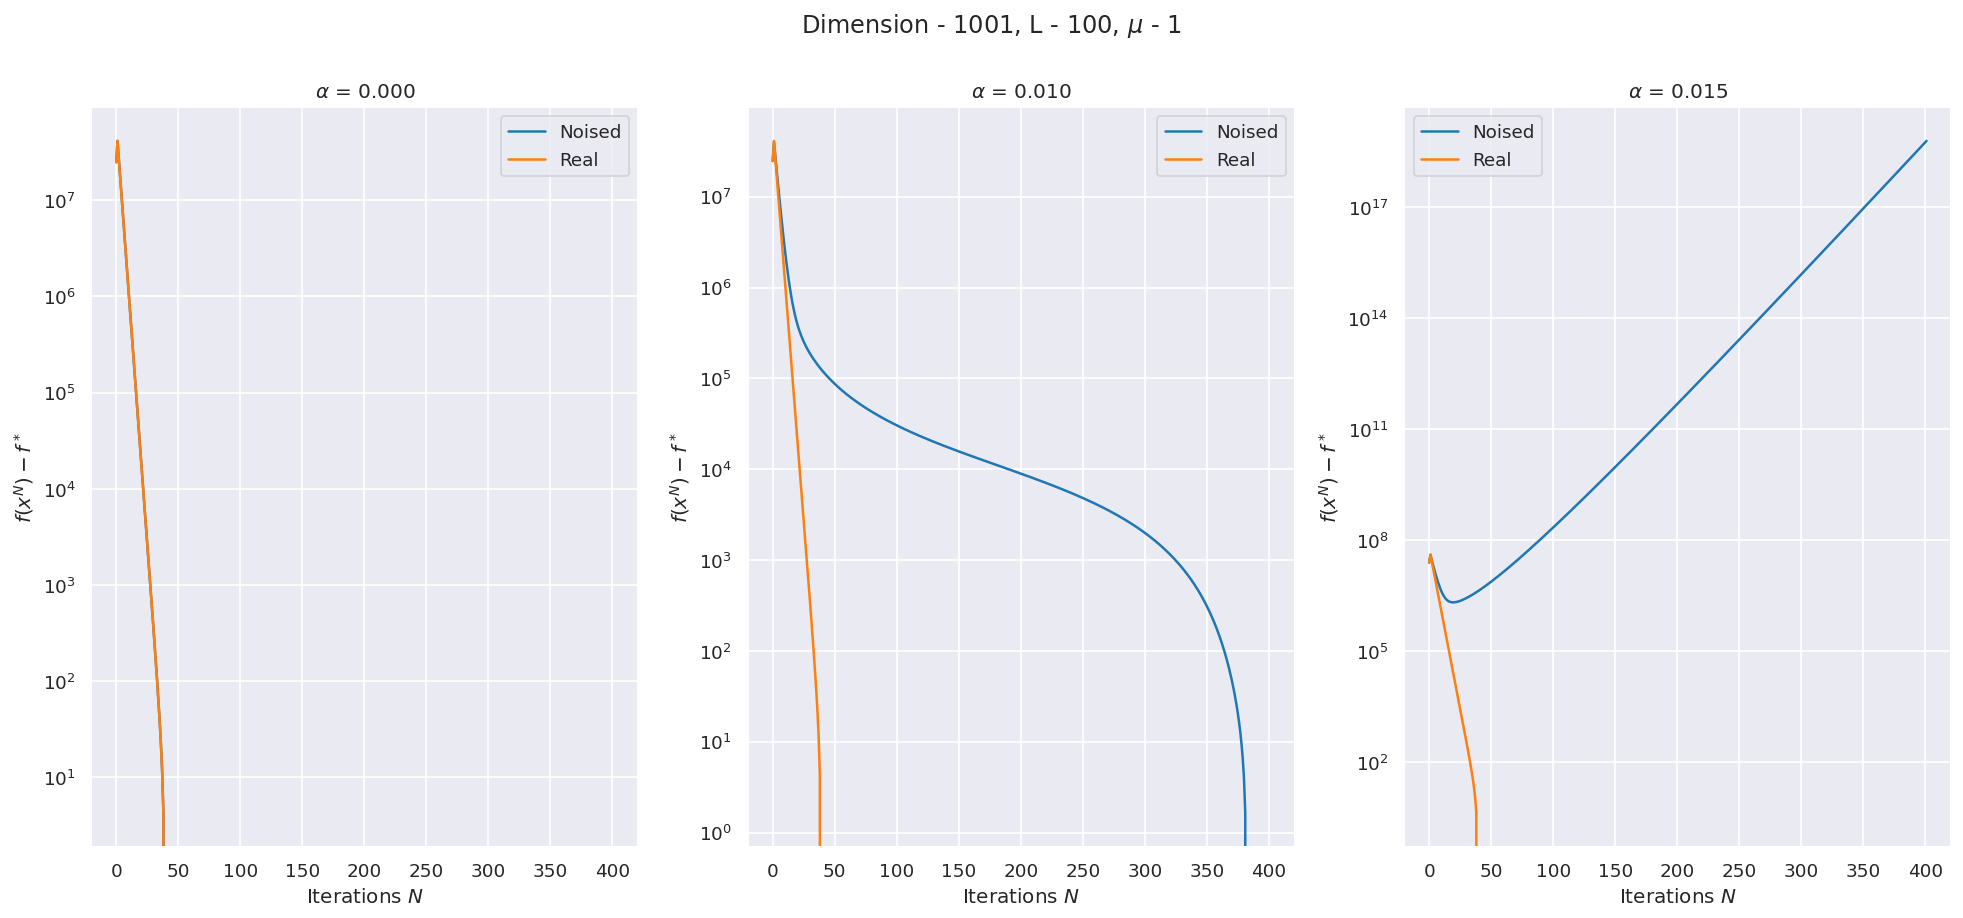

In [78]:
_ = nesterov_plot(400, alphas=[0, 0.01, 0.015], mu = 1, L = 100)

/tmp/ipykernel_92867/593263340.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

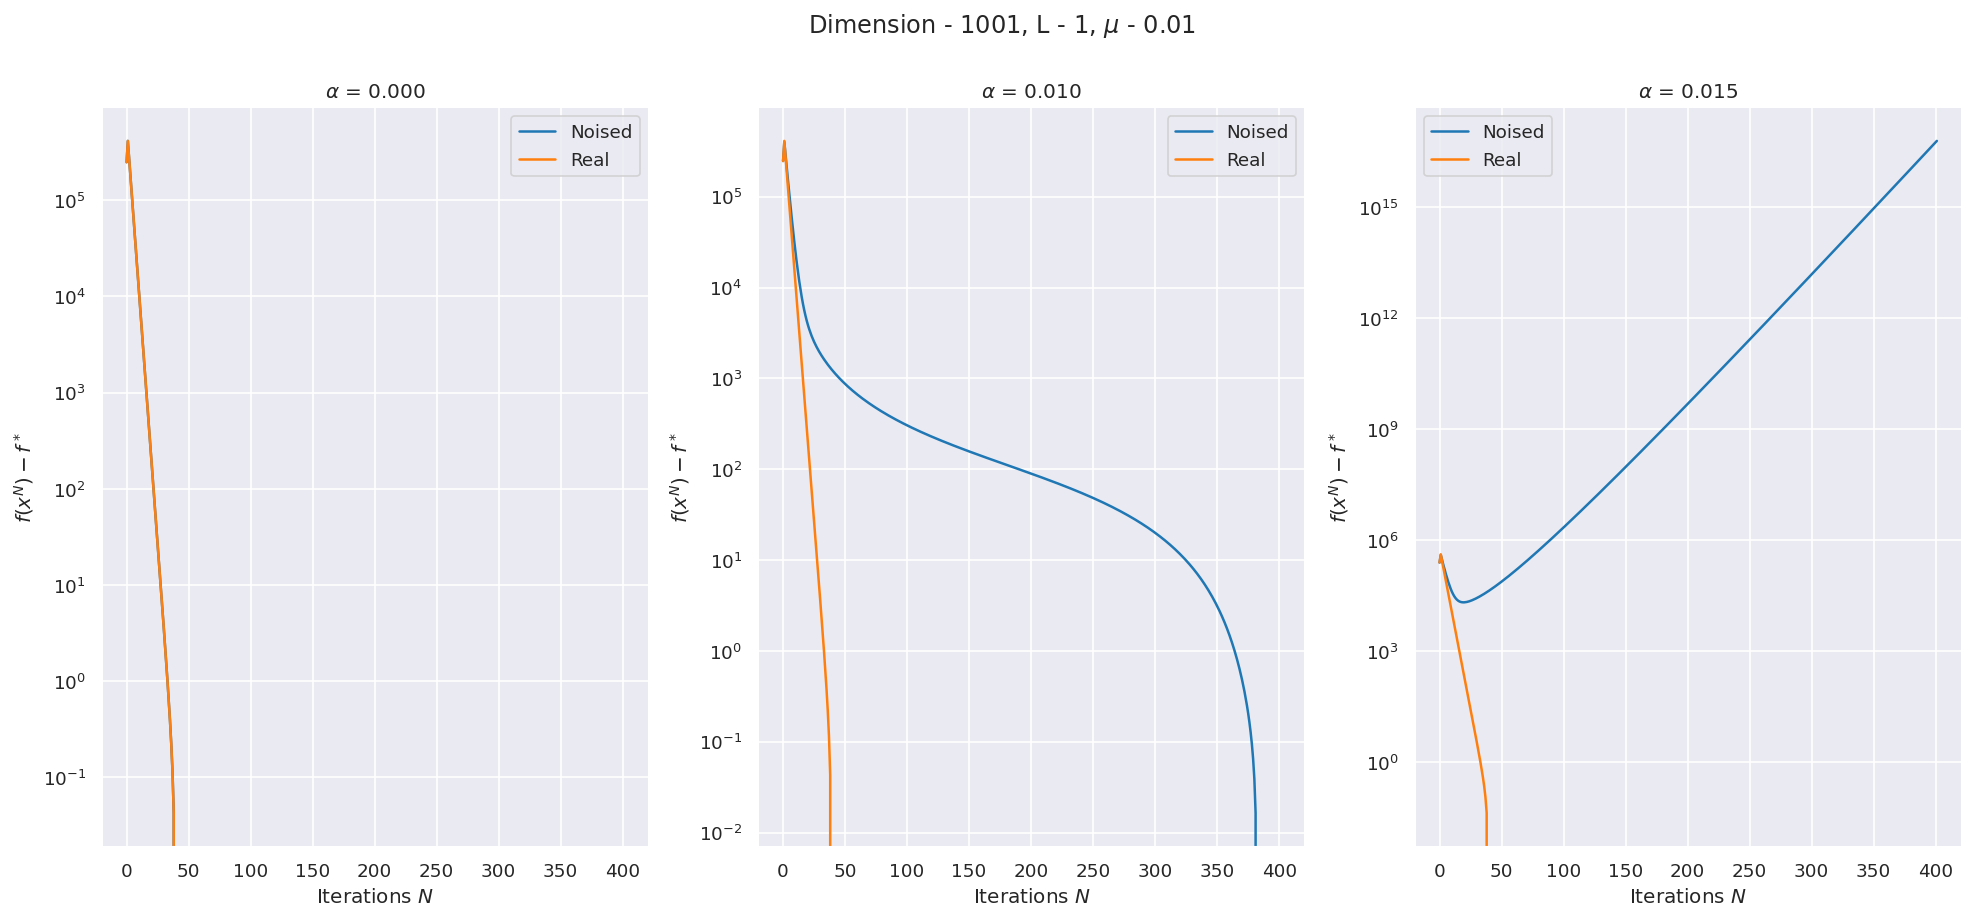

In [79]:
_ = nesterov_plot(400, alphas=[0, 0.01, 0.015], mu = 0.01, L = 1)